In [1]:
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from sklearn.utils import resample

# ALGOS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn import metrics
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve



import warnings

warnings.filterwarnings('ignore')

In [ ]:
# !pip install imbalanced-learn

In [2]:
modelling_df = pd.read_csv('../data/sinave4.csv')

In [3]:
modelling_df.shape

(341990, 74)

In [ ]:
# modelling_df.info()

In [4]:
modelling_df['estado'].value_counts(normalize = True)

ACTIVOS LEVES     0.474917
RECUPERADOS       0.451844
FALLECIDOS        0.057241
ACTIVOS GRAVES    0.015998
Name: estado, dtype: float64

In [ ]:
# modelling_df['estado'].value_counts()

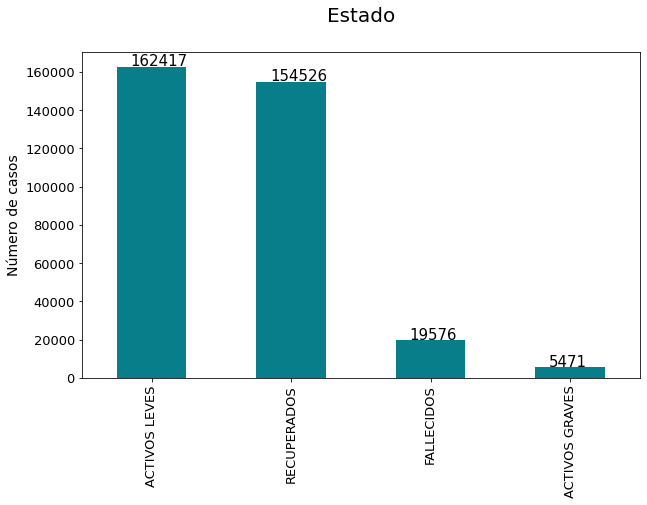

In [5]:
ax = modelling_df['estado'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Estado', size=20, pad=30)
ax.set_ylabel('Número de casos', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.10, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
sintomas_list = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis']
patologias_list = ['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']

In [ ]:
# modelling_df3 = modelling_df.copy()

In [6]:
modelling_df3_2cat = modelling_df.copy()

In [ ]:
# modelling_df3_2cat['estado'].replace(to_replace=['ACTIVOS LEVES', 'RECUPERADOS', 'FALLECIDOS', 'ACTIVOS GRAVES'],value=['RECUPERADOS','RECUPERADOS','FALLECIDOS','FALLECIDOS'],inplace=True)

In [7]:
modelling_df3_2cat = modelling_df3_2cat[modelling_df3_2cat["estado"].isin(['RECUPERADOS','FALLECIDOS'])]

In [8]:
modelling_df3_2cat.estado.unique()

array(['RECUPERADOS', 'FALLECIDOS'], dtype=object)

In [9]:
# Convert to dummies
modelling_df3_2cat['estado'].replace(to_replace=['RECUPERADOS', 'FALLECIDOS'], 
                                     value=[1,0],inplace=True)

# BALANCED MULTICLASS 

In [10]:
features = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis','diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']

In [11]:
X = modelling_df3_2cat[features].copy()
y = modelling_df3_2cat['estado'].copy()

In [12]:
from collections import Counter
counter = Counter(y)

for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=154526 (88.756%)
Class=0, n=19576 (11.244%)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (139281, 40) (139281,)
Test set: (34821, 40) (34821,)


In [14]:
# estandarizamos los datos

ss = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = ss.transform(X_train.astype(np.float))
X_test = ss.transform(X_test.astype(np.float))

## Logistic Regression Classifier

In [15]:
# Confusion Matrix plotting function
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


### OPTIMIZE FOR RMSE

In [16]:
# Encuentra los mejores hiperparámetros para logistic regression classifier
#Logistic Regression soporta solo solvers en ['liblinear', 'newton-cg', 'lbfgs', 'sag'3, 'saga']

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        y_pred = LR.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse_lr = mean_squared_error(y_test, y_pred)**0.5
        results.append(rmse_lr)
    results_df[s] = results
results_df

,newton-cg,lbfgs,sag,saga
C,,,,
0.0001,0.325752,0.325752,0.325752,0.325752
0.0010,0.323318,0.323318,0.323274,0.323274
0.0100,0.323673,0.323673,0.323673,0.323718
0.1000,0.323895,0.323895,0.323851,0.323895
1.0000,0.323895,0.323895,0.323895,0.323895
10.0000,0.323895,0.323939,0.323895,0.323895
100.0000,0.323895,0.323939,0.323895,0.323895


Confusion matrix, without normalization


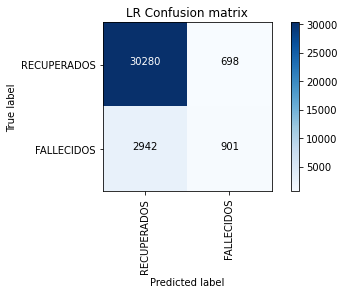

In [19]:
import itertools


# Ejecutamos logistic regression classifier y mostramos resultados

LR = LogisticRegression(C=0.0010, solver='newton-cg', random_state=42).fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


LR_RMSE = mean_squared_error(y_test, y_pred)**0.5
LR_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

LR_f_score = f1_score(y_test, y_pred, average='micro')
LR_f_score_train = f1_score(y_train, y_pred_train, average='micro')

LR_class_report = classification_report(y_test, y_pred)
LR_class_report_train = classification_report(y_train, y_pred_train)

LR_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [20]:

print('Logistic Regression train RMSE:', round(LR_RMSE_train, 4))
print('Logistic Regression test RMSE:', round(LR_RMSE, 4))

print('\nLogistic Regression TRAIN classification report:\n\n', LR_class_report_train)
print('Logistic Regression TEST classification report:\n\n', LR_class_report)

Logistic Regression train RMSE: 0.3255
Logistic Regression test RMSE: 0.3233

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.58      0.24      0.34     15733
           1       0.91      0.98      0.94    123548

    accuracy                           0.89    139281
   macro avg       0.74      0.61      0.64    139281
weighted avg       0.87      0.89      0.87    139281

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.56      0.23      0.33      3843
           1       0.91      0.98      0.94     30978

    accuracy                           0.90     34821
   macro avg       0.74      0.61      0.64     34821
weighted avg       0.87      0.90      0.88     34821



### OPTIMIZE FOR ACCURACY

In [21]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        j_score = jaccard_score(y_test, y_pred)
        results.append(j_score)
    results_df[s] = results
results_df

,newton-cg,lbfgs,liblinear,sag,saga
C,,,,,
0.0001,0.892689,0.892689,0.892689,0.892689,0.892689
0.0010,0.892689,0.892689,0.892689,0.892689,0.892689
0.0100,0.892689,0.892689,0.892689,0.892689,0.892689
0.1000,0.892689,0.892689,0.892689,0.892689,0.892689
1.0000,0.892689,0.892689,0.892689,0.892689,0.892689
10.0000,0.892689,0.892689,0.892689,0.892689,0.892689
100.0000,0.892689,0.892689,0.892689,0.892689,0.892689


Confusion matrix, without normalization


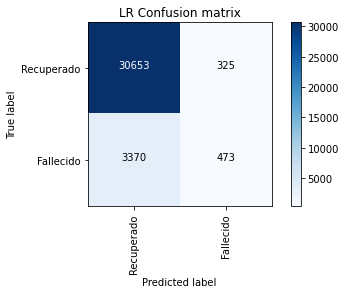

In [23]:
import itertools


# Ejecutamos logistic regression classifier y mostramos resultados

LR = LogisticRegression(C=0.0001, solver='newton-cg', random_state=42).fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

LR_j_score = jaccard_score(y_test, y_pred)
LR_j_score_train = jaccard_score(y_train, y_pred_train)

LR_f_score = f1_score(y_test, y_pred, average='weighted')
LR_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

LR_class_report = classification_report(y_test, y_pred)
LR_class_report_train = classification_report(y_train, y_pred_train)

LR_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS','FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [25]:
print('Logistic Regression TRAIN jaccard score:', round(LR_j_score_train, 4))
print('Logistic Regression TEST jaccard score:', round(LR_j_score, 4))

print('\nLogistic Regression TRAIN classification report:\n\n', LR_class_report_train)
print('Logistic Regression TEST classification report:\n\n', LR_class_report)

Logistic Regression TRAIN jaccard score: 0.8904
Logistic Regression TEST jaccard score: 0.8924

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.60      0.13      0.21     15733
           1       0.90      0.99      0.94    123548

    accuracy                           0.89    139281
   macro avg       0.75      0.56      0.58    139281
weighted avg       0.87      0.89      0.86    139281

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.59      0.12      0.20      3843
           1       0.90      0.99      0.94     30978

    accuracy                           0.89     34821
   macro avg       0.75      0.56      0.57     34821
weighted avg       0.87      0.89      0.86     34821



## Decision Tree Classifier

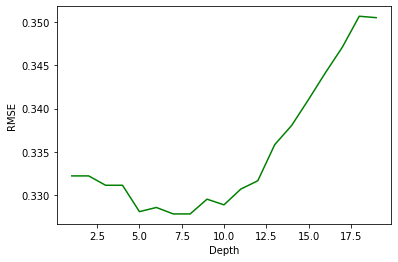

The best RMSE is 0.3278 with depth= 7


In [26]:
# Encuentra los mejores hiperparámetros para el decision tree classifier

#Usamos Cross Validation para encontrar la profundidad que de la precisión óptima

depth = 20 #20
mean_sqe = np.zeros((depth-1))
for n in range(1,depth): 
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    y_pred=DT.predict(X_test)
    
    mean_sqe[n-1] = mean_squared_error(y_test, y_pred)**0.5
plt.plot(range(1,depth),mean_sqe,'g')
plt.ylabel('RMSE')
plt.xlabel('Depth')
plt.show()
print("The best RMSE is", round(mean_sqe.min(), 4), "with depth=", mean_sqe.argmin()+1)

Confusion matrix, without normalization


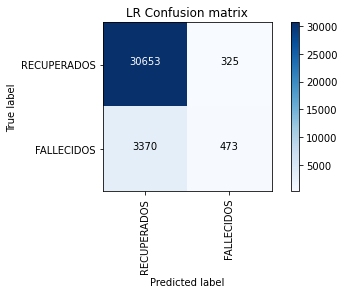

In [30]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 7, random_state=42).fit(X_train, y_train)
y_pred = DT.predict(X_test)
y_pred_train = DT.predict(X_train)


DT_RMSE = mean_squared_error(y_test, y_pred)**0.5
DT_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

DT_f_score = f1_score(y_test, y_pred, average='macro')
DT_f_score_train = f1_score(y_train, y_pred_train, average='macro')

DT_class_report = classification_report(y_test, y_pred)
DT_class_report_train = classification_report(y_train, y_pred_train)

DT_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [76]:
print('Decission Tree Classifier train RMSE:', round(DT_RMSE_train, 4))
print('Decission Tree Classifier RMSE:', round(DT_RMSE, 4))

print('\nDecission Tree Classifier TRAIN classification report:\n\n', DT_class_report_train)
print('Decission Tree Classifier TEST classification report:\n\n', DT_class_report)

Decission Tree Classifier train RMSE: 0.3287
Decission Tree Classifier RMSE: 0.3258
\Decission Tree Classifier TRAIN classification report:

               precision    recall  f1-score   support

           0       0.60      0.13      0.21     15733
           1       0.90      0.99      0.94    123548

    accuracy                           0.89    139281
   macro avg       0.75      0.56      0.58    139281
weighted avg       0.87      0.89      0.86    139281

Decission Tree Classifier TEST classification report:

               precision    recall  f1-score   support

           0       0.59      0.12      0.20      3843
           1       0.90      0.99      0.94     30978

    accuracy                           0.89     34821
   macro avg       0.75      0.56      0.57     34821
weighted avg       0.87      0.89      0.86     34821



## Random Forest Classifier

In [46]:
n_estimators = [500, 700]
max_depth = [15, 25]
min_samples_split = [15, 100]

In [47]:
gs = GridSearchCV(
    estimator = RandomForestClassifier(), 
    param_grid = {
          "n_estimators" : n_estimators,
          "max_depth" : max_depth,
          },
          cv=5,
          verbose=3,
          scoring = "neg_root_mean_squared_error",
          return_train_score = True
)

In [48]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=15, n_estimators=500;, score=(train=-0.280, test=-0.322) total time=  48.8s
[CV 2/5] END max_depth=15, n_estimators=500;, score=(train=-0.278, test=-0.328) total time=  49.0s
[CV 3/5] END max_depth=15, n_estimators=500;, score=(train=-0.278, test=-0.326) total time=  48.0s
[CV 4/5] END max_depth=15, n_estimators=500;, score=(train=-0.278, test=-0.327) total time=  52.8s
[CV 5/5] END max_depth=15, n_estimators=500;, score=(train=-0.278, test=-0.324) total time=  48.9s
[CV 1/5] END max_depth=15, n_estimators=700;, score=(train=-0.280, test=-0.322) total time= 1.1min
[CV 2/5] END max_depth=15, n_estimators=700;, score=(train=-0.277, test=-0.328) total time= 1.1min
[CV 3/5] END max_depth=15, n_estimators=700;, score=(train=-0.278, test=-0.326) total time= 1.1min
[CV 4/5] END max_depth=15, n_estimators=700;, score=(train=-0.278, test=-0.326) total time= 1.2min
[CV 5/5] END max_depth=15, n_estimators=700;, sco

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 25], 'n_estimators': [500, 700]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [57]:
grid_search_results = grid_search_results[['param_max_depth',
       'mean_test_score', 'mean_train_score']]

In [52]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,mean_test_score,mean_train_score
0,15,-0.325505,-0.278216
1,15,-0.325595,-0.278158
2,25,-0.336365,-0.214613
3,25,-0.336483,-0.214638


In [53]:
best_tree = gs.best_estimator_

In [54]:
best_tree

RandomForestClassifier(max_depth=15, n_estimators=500)

In [58]:
rmse_train = mean_squared_error(best_tree.predict(X_train), y_train)**0.5


In [60]:
round(rmse,2)

0.28

In [61]:
rmse_test = mean_squared_error(best_tree.predict(X_test), y_test)**0.5

In [63]:
round(rmse_test,2)

0.32

In [66]:
feature_imp = pd.Series(best_tree.feature_importances_, index=X.columns).sort_values(ascending=False)

In [68]:
# feature_imp

Confusion matrix, without normalization


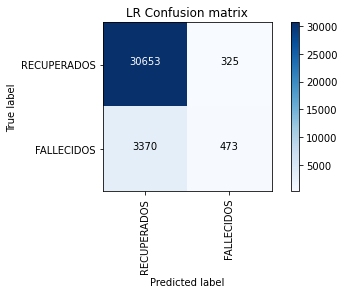

In [69]:
RF = RandomForestClassifier(criterion="entropy", max_depth = 15, random_state=42).fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred_train = RF.predict(X_train)


RF_RMSE = mean_squared_error(y_test, y_pred)**0.5
RF_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

RF_f_score = f1_score(y_test, y_pred, average='macro')
RF_f_score_train = f1_score(y_train, y_pred_train, average='macro')

RF_class_report = classification_report(y_test, y_pred)
RF_class_report_train = classification_report(y_train, y_pred_train)

RF_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [70]:
print('Random Forest Classifier TRAIN RMSE:', round(RF_RMSE_train, 4))
print('Random Forest TEST RMSE:', round(RF_RMSE, 4))

print('\nRandom Forest Classifier TRAIN classification report:\n\n', RF_class_report_train)
print('Random Forest Classifier TEST classification report:\n\n', RF_class_report)

Logistic Regression train RMSE: 0.3287
Logistic Regression test RMSE: 0.3258

Logistic Regression TRAIN classification report:

               precision    recall  f1-score   support

           0       0.60      0.13      0.21     15733
           1       0.90      0.99      0.94    123548

    accuracy                           0.89    139281
   macro avg       0.75      0.56      0.58    139281
weighted avg       0.87      0.89      0.86    139281

Logistic Regression TEST classification report:

               precision    recall  f1-score   support

           0       0.59      0.12      0.20      3843
           1       0.90      0.99      0.94     30978

    accuracy                           0.89     34821
   macro avg       0.75      0.56      0.57     34821
weighted avg       0.87      0.89      0.86     34821



## K-Nearest Neighbors (KNN) Classifier

In [71]:
Ks = 38 #38
mean_sqr = np.zeros((Ks-1))
std_sqr = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred= KNN.predict(X_test)
    mean_sqr[n-1] = mean_squared_error(y_test, y_pred)**0.5
    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

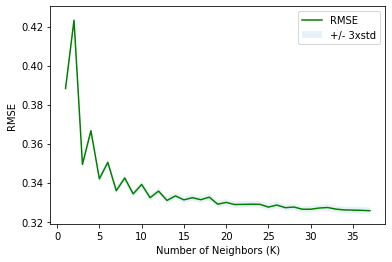

The best RMSE was with 0.3256 with k= 37


In [74]:
plt.plot(range(1,Ks),mean_sqr,'g')
plt.fill_between(range(1,Ks),mean_sqr - 1 * std_sqr,mean_sqr + 1 * std_sqr, alpha=0.10)
plt.legend(('RMSE ', '+/- 3xstd'))

plt.ylabel('RMSE')
plt.xlabel('Number of Neighbors (K)')
plt.show()
print("The best RMSE was with", round(mean_sqr.min(), 4), "with k=", mean_sqr.argmin()+1)

Confusion matrix, without normalization


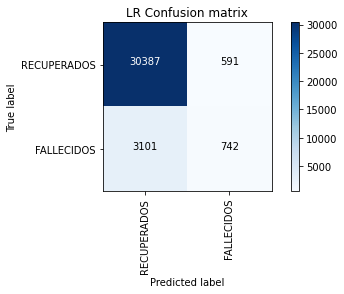

In [78]:
KNN = KNeighborsClassifier(n_neighbors = 37).fit(X_train,y_train)
y_pred = KNN.predict(X_test)
y_pred_train = KNN.predict(X_train)


KNN_RMSE = mean_squared_error(y_test, y_pred)**0.5
KNN_RMSE_train = mean_squared_error(y_train, y_pred_train)**0.5

KNN_f_score = f1_score(y_test, y_pred, average='weighted')
KNN_f_score_train = f1_score(y_train, y_pred_train, average='weighted')

KNN_class_report = classification_report(y_test, y_pred)
KNN_class_report_train = classification_report(y_train, y_pred_train)

KNN_dict = classification_report(y_test, y_pred, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RECUPERADOS', 'FALLECIDOS'],normalize=False,  title='LR Confusion matrix')

In [77]:
print('KNN Classifier TRAIN RMSE:', round(KNN_RMSE_train, 4))
print('KNN Classifier TEST RMSE:', round(KNN_RMSE, 4))

print('\nKNN Classifier TRAIN TRAIN classification report:\n\n', KNN_class_report_train)
print('KNN Classifier TRAIN TEST classification report:\n\n', KNN_class_report)

KNN Classifier TRAIN RMSE: 0.3287
KNN Classifier TEST RMSE: 0.3258

KNN Classifier TRAIN TRAIN classification report:

               precision    recall  f1-score   support

           0       0.60      0.13      0.21     15733
           1       0.90      0.99      0.94    123548

    accuracy                           0.89    139281
   macro avg       0.75      0.56      0.58    139281
weighted avg       0.87      0.89      0.86    139281

KNN Classifier TRAIN TEST classification report:

               precision    recall  f1-score   support

           0       0.59      0.12      0.20      3843
           1       0.90      0.99      0.94     30978

    accuracy                           0.89     34821
   macro avg       0.75      0.56      0.57     34821
weighted avg       0.87      0.89      0.86     34821



## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
yhat = gnb.predict(X_test)
yhat_train = gnb.predict(X_train)


gnb_j_score = jaccard_score(y_test, yhat)
gnb_j_score_train = jaccard_score(y_train, yhat_train)


gnb_f_score = f1_score(y_test, yhat, average='weighted')
gnb_f_score_train = f1_score(y_train, yhat_train, average='weighted')


gnb_class_report = classification_report(y_test, yhat)
gnb_class_report_train = classification_report(y_train, yhat_train)


gnb_dict = classification_report(y_test, yhat, output_dict=True)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fallecido','Recuperado'],normalize=False,  title='GaussianNB Confusion matrix')